# Setup

In [1]:
# Import packages
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler

# Models
from sklearn.ensemble import RandomForestClassifier

# Utilities
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
pd.set_option("display.max_columns", None)

# Load Data

In [3]:
directory = "/mnt/hd2/database/churn-dataset/" 
name = "churn_data.csv"

# Load dataset
dataset = pd.read_csv(os.path.join(directory, name))
print("Dataset:", dataset.shape)
dataset.head()

Dataset: (27000, 31)


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
# Get statistical analysis on dataset
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,0.050630,0.013111,8.197852,0.952481,0.606074,0.561741,0.393926,0.587259,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,0.871366,0.238158,12.497243,0.212749,0.488628,0.496183,0.488628,0.492336,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,0.000000,0.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,65.000000,27.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [5]:
dataset.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

# Handle NaNs

In [6]:
dataset[["age", "credit_score", "rewards_earned"]].isna().sum()

age                  4
credit_score      8031
rewards_earned    3227
dtype: int64

In [7]:
# `Age` column has very few NaNs
dataset["age"].fillna(int(dataset["age"].mode()), inplace=True)

# `credit_score` and `rewards_earned` column has a lot of NaNs
dataset["credit_score"].fillna(dataset["credit_score"].mean(), inplace=True)
dataset["rewards_earned"].fillna(dataset["rewards_earned"].mean() + dataset["rewards_earned"].std(), inplace=True)

In [8]:
dataset.isnull().any()

user                       False
churn                      False
age                        False
housing                    False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned             False
reward_rate                False
is_referre

# Frequency Distribution

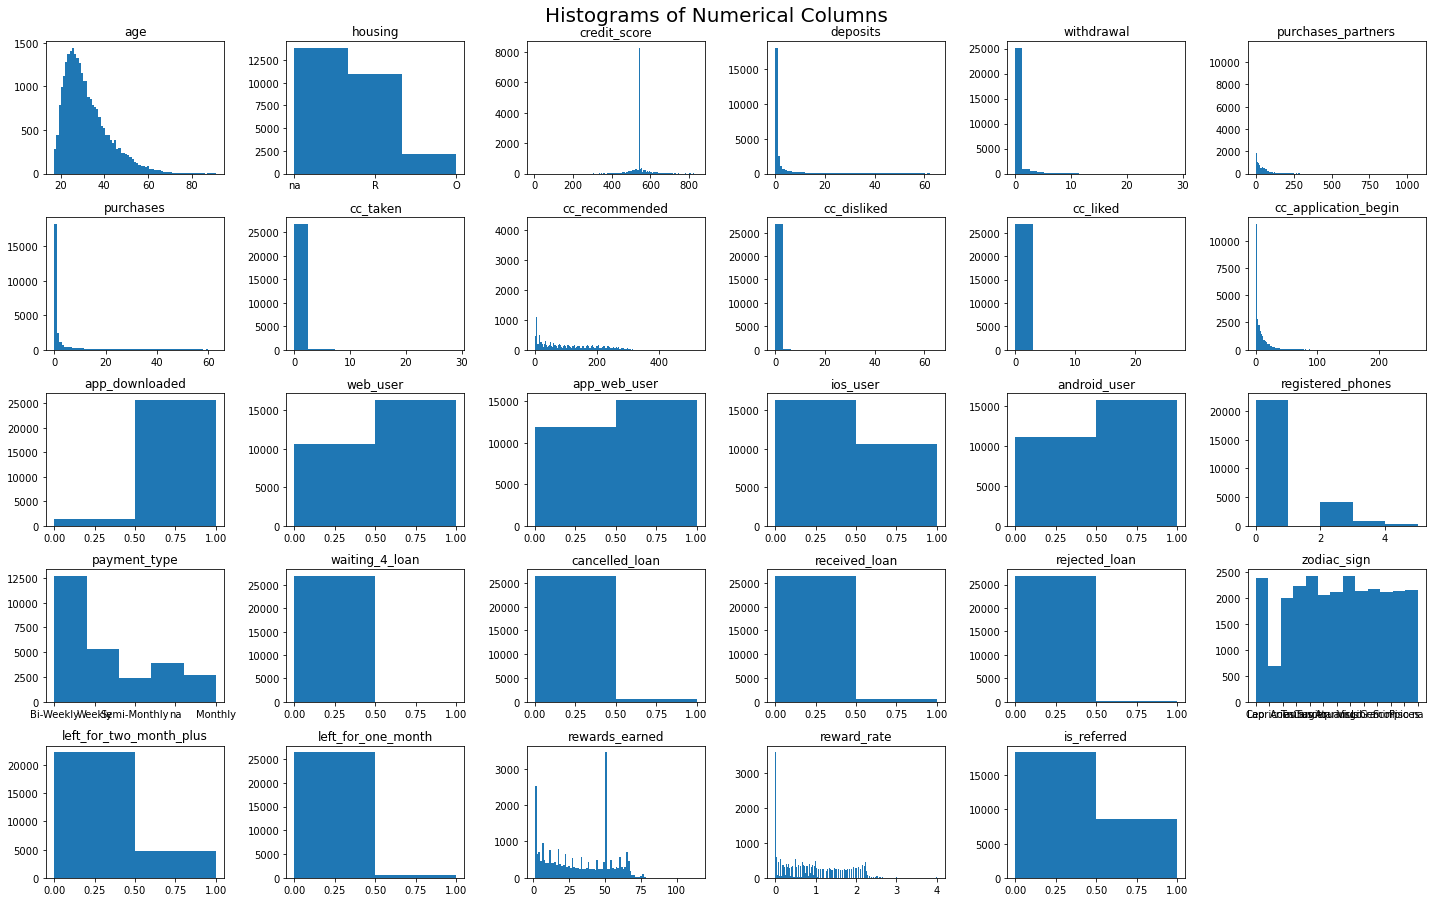

In [9]:
# Plot frequency distribution
dataset2 = dataset.drop(columns=["user", "churn"])

fig = plt.figure(figsize=(20, 15))

plt.suptitle("Histograms of Numerical Columns", fontsize=20)

# Plot a subplot for each feature column
for i in range(1, dataset2.shape[1] + 1):
    # Set subplot
    plt.subplot(6, 6, i)
    
    # Get current axes and set subplot metadata
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    # Plot
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i - 1], bins=vals)

# Adjust padding
plt.tight_layout(rect=[0, 0, 1, 1])

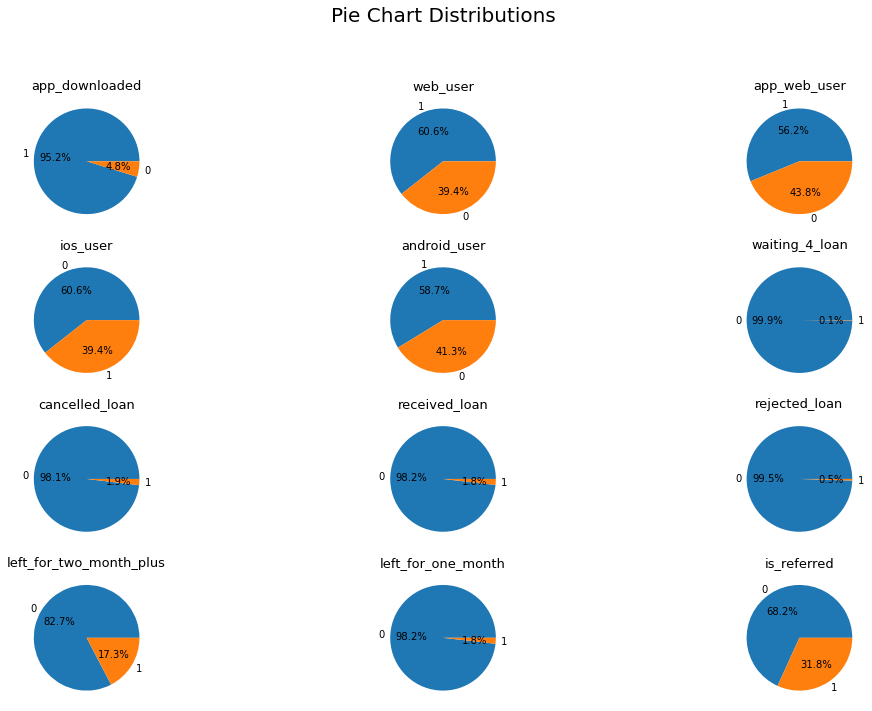

In [10]:
# Plot only binary features - check prevalence
binary_columns = [col for col in dataset.columns if len(dataset[col].unique()) == 2 and col not in ["user", "churn"]]

dataset3 = dataset[binary_columns]

fig = plt.figure(figsize=(15, 15))
plt.suptitle("Pie Chart Distributions", fontsize=20)

# Iteratively plot piecharts
for i in range(1, dataset3.shape[1] + 1):
    # Set subplot
    plt.subplot(6, 3, i)
    
    # Get axes and set metadata
    f = plt.gca()
    f.set_title(dataset3.columns.values[i - 1], fontsize=13)
    
    # Plot
    values = dataset3.iloc[:, i - 1].value_counts(normalize=True).values
    index = dataset3.iloc[:, i - 1].value_counts(normalize=True).index
    plt.pie(values, labels=index, autopct="%1.1f%%")

# Adjust padding
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# Feature Correlation

<AxesSubplot:title={'center':'Correlation with Dependent Variable'}>

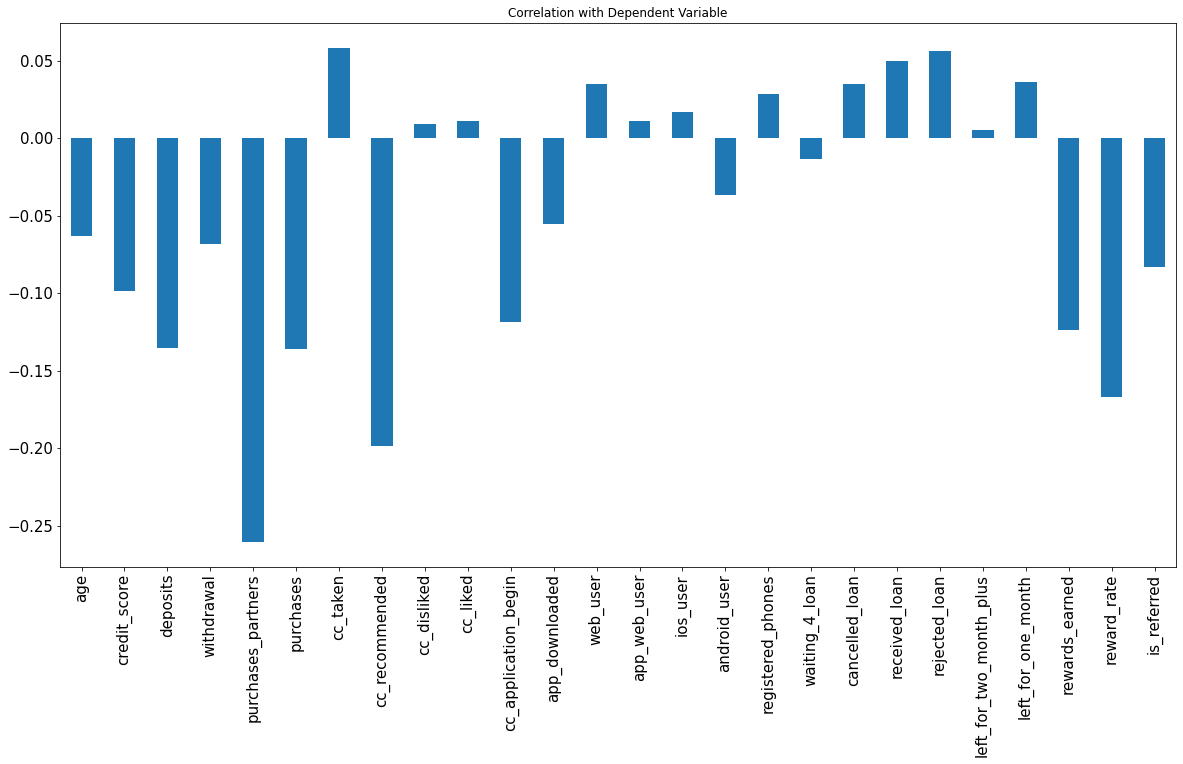

In [11]:
# Plot pair wise correlation with the dependent (target) variable
numeric_columns = [col for col in dataset.columns if type(dataset[col]) != "object" and col not in ["user", "churn"]]

dataset4 = dataset[numeric_columns]

dataset4.corrwith(dataset.churn, axis=0).plot.bar(
    figsize=(20,10),
    title="Correlation with Dependent Variable",
    fontsize=15)

<AxesSubplot:>

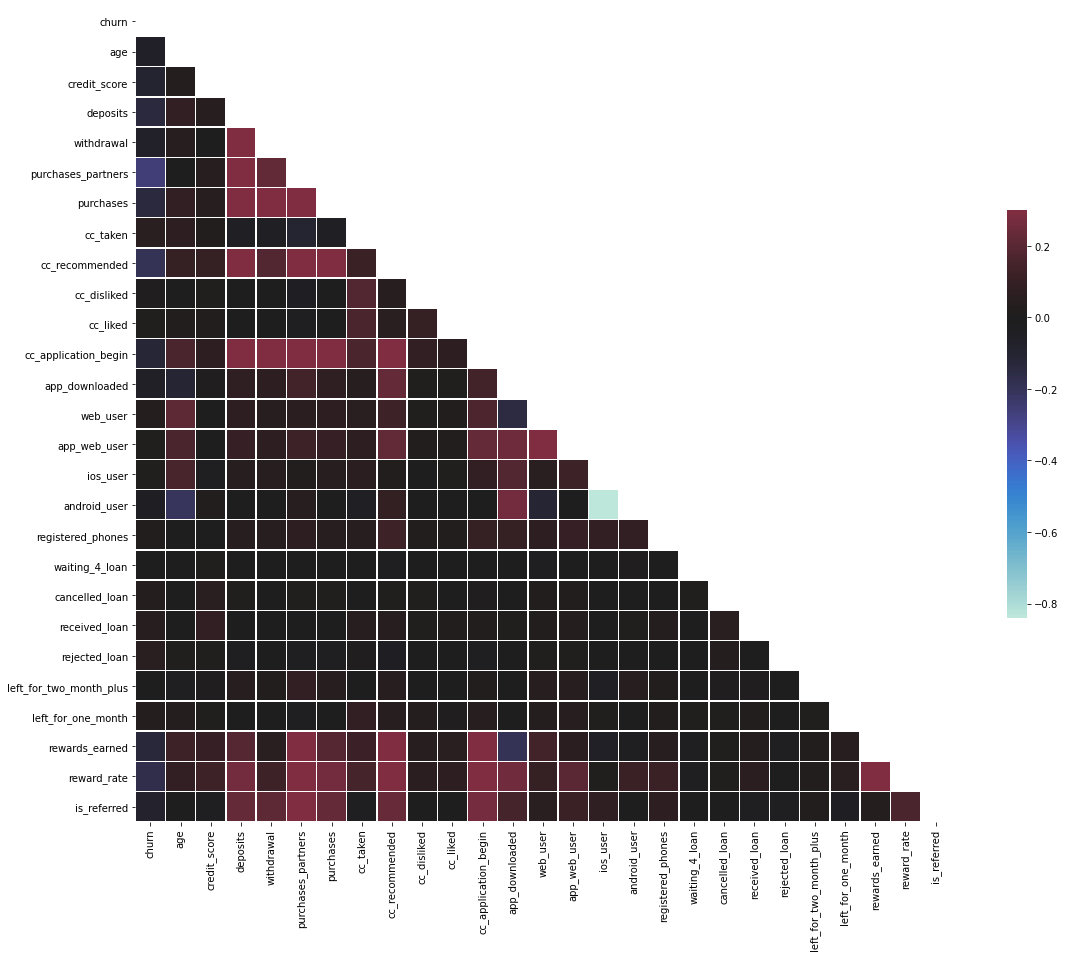

In [12]:
# Compute correlation matrix
dataset5 = dataset.drop(columns=["user"])
corr = dataset5.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)

# Get indices of the upper triangle
upper_triangle_indices = np.triu_indices_from(mask)

# Set mask to remove upper traingle (redundant piece of information)
mask[upper_triangle_indices] = True

# Plot the heatmap with mask
plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Encode Features

In [13]:
# Get encoding feature list
encode_features = [col for col in dataset.columns if dataset[col].dtype == "object"]
print("Encode Features:", encode_features)

# Instantiate encoder
feature_encoder = OrdinalEncoder(dtype=np.int64)

# Encode features
dataset[encode_features] = feature_encoder.fit_transform(dataset[encode_features])
dataset.head()

Encode Features: ['housing', 'payment_type', 'zodiac_sign']


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,2,542.944225,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,5,1,0,51.083603,0.00,0
1,23547,0,28.0,1,486.000000,0,0,1,0,0,96,0,0,5,1,1,1,1,0,0,3,0,0,0,0,5,0,0,44.000000,1.47,1
2,58313,0,35.0,1,561.000000,47,2,86,47,0,285,0,0,9,1,0,0,0,1,2,2,0,0,0,0,3,1,0,65.000000,2.17,0
3,8095,0,26.0,1,567.000000,26,3,38,25,0,74,0,0,26,1,0,0,0,1,0,0,0,0,0,0,3,0,0,33.000000,1.10,1
4,61353,1,27.0,2,542.944225,0,0,2,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,1,0,1.000000,0.03,0


# Prepare Model Input

In [14]:
# Split dataset into the train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    dataset.drop(columns=["user", "churn"]),
    dataset["churn"],
    test_size=0.2,
    random_state=2021)

print("Train dataset:", X_train.shape, y_train.shape)
print("Test dataset:", X_val.shape, y_val.shape)

Train dataset: (21600, 29) (21600,)
Test dataset: (5400, 29) (5400,)


In [15]:
X_train.head()

,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
26527,30.0,0,582.000000,0,0,57,0,0,154,0,0,9,1,0,0,0,1,0,0,0,0,0,0,12,0,0,45.000000,1.50,0
20973,33.0,1,485.000000,0,0,0,0,0,251,0,0,18,1,1,1,1,1,2,4,0,0,0,0,9,0,0,68.000000,2.27,0
458,48.0,2,542.944225,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,10,1,0,2.000000,0.00,0
22608,36.0,0,611.000000,1,1,77,1,0,111,0,0,8,1,1,1,0,1,0,4,0,0,0,0,7,0,0,23.000000,0.96,1
15378,33.0,2,542.944225,0,0,0,0,0,4,0,0,0,1,1,1,1,0,0,0,0,0,0,0,5,0,0,51.083603,0.00,0


In [16]:
X_val.head()

,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
13108,33.0,0,458.000000,10,2,18,10,0,46,0,0,12,1,1,1,1,0,2,1,0,0,0,0,12,0,0,18.0,0.60,1
13406,23.0,1,455.000000,0,0,5,0,0,0,0,0,0,1,0,0,0,1,2,4,0,0,0,0,2,0,0,3.0,0.10,1
18326,35.0,0,542.944225,44,2,57,44,0,200,0,0,10,1,1,1,0,1,0,1,0,0,0,0,2,0,0,49.0,1.63,1
11549,22.0,1,542.944225,0,0,57,0,0,154,0,0,0,1,1,1,0,1,0,0,0,0,0,0,6,0,0,35.0,1.17,0
23231,42.0,2,542.944225,0,0,35,0,0,70,0,0,3,1,1,1,0,1,0,0,0,0,0,0,9,0,0,16.0,0.57,0


# Handling Imbalanced Data

In [17]:
# Target distribution in train
print("Train target distribution:\n", y_train.value_counts())

Train target distribution:
 0    12672
1     8928
Name: churn, dtype: int64


In [18]:
# Get class wise indices
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

# Under sampling Majority class
higher = np.random.choice(higher, size=len(lower)).tolist()
lower = np.asarray(lower).tolist()

new_indexes = lower + higher

# Updated training dataset
X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

print("Train:", X_train.shape, y_train.shape)

Train: (17856, 29) (17856,)


# Feature Scaling

In [19]:
# Instantiate scaler
rb_scaler = RobustScaler()

# Scale features
X_train = pd.DataFrame(rb_scaler.fit_transform(X_train))
X_val = pd.DataFrame(rb_scaler.transform(X_val))

print("Train dataset:", X_train.shape, y_train.shape)
print("Test dataset:", X_val.shape, y_val.shape)

Train dataset: (17856, 29) (17856,)
Test dataset: (5400, 29) (5400,)


# Modelling

In [20]:
# Instantiate model
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion="gini", n_jobs=16, verbose=True, random_state=2021)

# Cross validate
scores = cross_validate(estimator=rf_classifier, X=X_train, y=y_train, cv=5, scoring=["accuracy", "recall", "precision", "f1"], n_jobs=16, verbose=True)

# Compute performance metrics
print("Accuracy: {:.2f}%".format(np.mean(scores["test_accuracy"]) * 100))
print("Recall: {:.2f}%".format(np.mean(scores["test_recall"]) * 100))
print("Precision: {:.2f}%".format(np.mean(scores["test_precision"]) * 100))
print("F1: {:.2f}%".format(np.mean(scores["test_f1"]) * 100))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


Accuracy: 79.02%
Recall: 77.01%
Precision: 80.25%
F1: 78.59%


[Parallel(n_jobs=16)]: Done   5 out of   5 | elapsed:   10.9s finished


In [21]:
# Instantiate model
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion="gini", class_weight="balanced", n_jobs=16, verbose=True, random_state=2021)

# Fit model to training dataset
rf_classifier.fit(X=X_train, y=y_train)

# Evaluate on validation test
rf_yhat = rf_classifier.predict(X_val)

# Compute performance metrics
print("Accuracy on validation: {:.2f}%".format(accuracy_score(y_val, rf_yhat)*100))
print("Recall on Validation: {:.2f}%".format(recall_score(y_val, rf_yhat)*100))
print("Precision on validation: {:.2f}%".format(precision_score(y_val, rf_yhat)*100))

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    2.3s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    2.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s


Accuracy on validation: 70.39%
Recall on Validation: 77.07%
Precision on validation: 61.49%


[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed:    0.3s finished


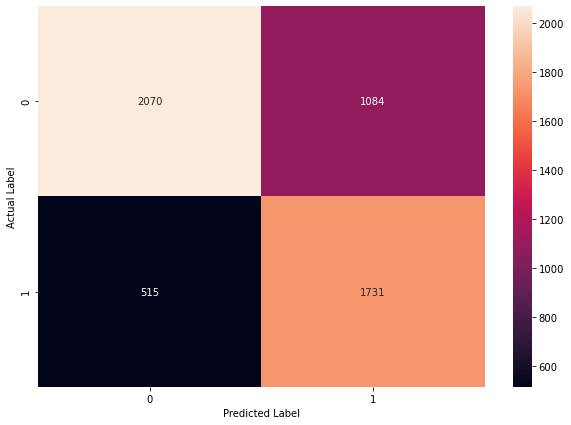

In [22]:
# Compute confusion matrix
matrix = confusion_matrix(y_val, rf_yhat)

# Create matrxi df
matrix_df = pd.DataFrame(matrix, index=(0, 1), columns=(0, 1))

# Visualize confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g")

# Add metadata
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label") 
plt.show()

# Understand Churn Factors

In [23]:
# Analyzing Coefficients
features_df = pd.concat([
    pd.DataFrame(dataset.columns.drop(["user", "churn"]), columns=["Features"]),
    pd.DataFrame(np.transpose(rf_classifier.feature_importances_),columns = ["Coef"])],
    axis = 1)

features_df

,Features,Coef
0,age,0.105036
1,housing,0.023805
2,credit_score,0.095013
3,deposits,0.023587
4,withdrawal,0.010220
5,purchases_partners,0.140956
6,purchases,0.023028
7,cc_taken,0.006775
8,cc_recommended,0.101556
9,cc_disliked,0.003019


In [24]:
# Select top k features
k = 5
topk_pos = features_df.sort_values("Coef", ascending=False)[:k]
topk_neg = features_df.sort_values("Coef", ascending=True)[:k]

print("Top {} features determining customer decision to exit: \n {}\n".format(k, topk_pos))

print("Top {} features determining customer to keep subscription: \n {}\n".format(k, topk_neg))

Top 5 features determining customer decision to exit: 
               Features      Coef
5   purchases_partners  0.140956
0                  age  0.105036
8       cc_recommended  0.101556
2         credit_score  0.095013
27         reward_rate  0.094381

Top 5 features determining customer to keep subscription: 
           Features      Coef
19  waiting_4_loan  0.000329
22   rejected_loan  0.001387
10        cc_liked  0.001425
12  app_downloaded  0.001584
9      cc_disliked  0.003019

